In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local[*]")\
        .appName('PySpark_Tutorial')\
        .getOrCreate()



In [2]:
from pyspark.sql.types import *

data_schema = [
               StructField('_c0', IntegerType(), True),
               StructField('symbol', StringType(), True),
               StructField('data', DateType(), True),
               StructField('open', DoubleType(), True),
               StructField('high', DoubleType(), True),
               StructField('low', DoubleType(), True),
               StructField('close', DoubleType(), True),
               StructField('volume', IntegerType(), True),
               StructField('adjusted', DoubleType(), True),
               StructField('market.cap', StringType(), True),
               StructField('sector', StringType(), True),
               StructField('industry', StringType(), True),
               StructField('exchange', StringType(), True),
            ]

final_struc = StructType(fields = data_schema)

data = spark.read.csv(
    'stocks_price_final.csv',
    sep=',',
    header=True,
    schema=final_struc 
)

data.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- symbol: string (nullable = true)
 |-- data: date (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: integer (nullable = true)
 |-- adjusted: double (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



In [3]:
data.head(5)

[Row(_c0=1, symbol='TXG', data=datetime.date(2019, 9, 12), open=54.0, high=58.0, low=51.0, close=52.75, volume=7326300, adjusted=52.75, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=2, symbol='TXG', data=datetime.date(2019, 9, 13), open=52.75, high=54.355, low=49.150002, close=52.27, volume=1025200, adjusted=52.27, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=3, symbol='TXG', data=datetime.date(2019, 9, 16), open=52.450001, high=56.0, low=52.009998, close=55.200001, volume=269900, adjusted=55.200001, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=4, symbol='TXG', data=datetime.date(2019, 9, 17), open=56.209999, high=60.900002, low=55.423, close=56.779999, volume=602800, adjusted=56.779999, market.cap='$9.31B', sector='Capit

In [4]:
data.first()

Row(_c0=1, symbol='TXG', data=datetime.date(2019, 9, 12), open=54.0, high=58.0, low=51.0, close=52.75, volume=7326300, adjusted=52.75, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ')

In [5]:
data.show()

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      data|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.2

In [6]:
data = data.withColumn('date', data.data)

data.show(5)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+----------+
|_c0|symbol|      data|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|      date|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+----------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2019-09-12|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2019-09-13|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2019-09-16|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotec

In [7]:
data = data.withColumnRenamed('date', 'data_changed')

data.show(5)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+------------+
|_c0|symbol|      data|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|data_changed|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+------------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|  2019-09-12|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|  2019-09-13|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|  2019-09-16|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital 

In [8]:
data = data.drop('data_changed')

data.show(5)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      data|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.2

In [9]:
data = data.withColumnRenamed('market.cap', 'market_cap')


In [10]:

data.show(5)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      data|     open|     high|      low|    close| volume| adjusted|market_cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.2

In [11]:
data.na.drop()
data.show()

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      data|     open|     high|      low|    close| volume| adjusted|market_cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.2

In [12]:
from pyspark.sql.functions import col, lit

data.filter( (col('data') >= lit('2020-01-01')) & (col('data') <= lit('2020-01-31')) ).show(5)

+---+------+----------+---------+---------+---------+---------+------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      data|     open|     high|      low|    close|volume| adjusted|market_cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+------+---------+----------+-------------+--------------------+--------+
| 78|   TXG|2020-01-02|76.910004|77.989998|71.480003|72.830002|220200|72.830002|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 79|   TXG|2020-01-03|71.519997|76.188004|70.580002|75.559998|288300|75.559998|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 80|   TXG|2020-01-06|75.269997|77.349998|73.559998|75.550003|220600|75.550003|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 81|   TXG|2020-01-07|     76.0|77.279999|    75.32|75.980003|182400|75.980003|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 82|   TXG|2020-01-08|76.089996|76.949997|72.73

In [13]:
data.filter(data.adjusted.between(100.0, 500.0)).show()

+----+------+----------+----------+----------+----------+----------+------+----------+----------+-------------+--------------------+--------+
| _c0|symbol|      data|      open|      high|       low|     close|volume|  adjusted|market_cap|       sector|            industry|exchange|
+----+------+----------+----------+----------+----------+----------+------+----------+----------+-------------+--------------------+--------+
|  93|   TXG|2020-01-24| 95.459999|     101.0| 94.157997|100.790001|328100|100.790001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  94|   TXG|2020-01-27| 99.760002|104.892998| 97.019997|103.209999|334900|103.209999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  95|   TXG|2020-01-28|104.620003|108.269997|103.297997|106.620003|245400|106.620003|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|6893|  ABMD|2019-01-02|315.940002|320.709991|307.029999|309.959991|590000|309.959991|   $13.39B|  Health Care|Medical/Dental In...|  NASDAQ|
|6894|

In [14]:
data.filter(col('sector')=='Capital Goods').show()

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      data|     open|     high|      low|    close| volume| adjusted|market_cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.2

In [15]:
from pyspark.sql import functions as f

data = data.withColumn('is_more_than_200', 
            f.when(data.adjusted >= 200.0, 1).otherwise(0)
)


In [16]:
data = data.filter(col('is_more_than_200') == 1).drop('is_more_than_200')

In [17]:
df2 = data.select(['industry','open', 'close', 'adjusted'])
df2 = df2.withColumn('diffopen', (f.abs(df2.close - df2.open))*100/(df2.open))
df2 = df2.withColumn('diffclose', f.abs(df2.close - df2.open)*100/(df2.close))
df2 = df2.select(['industry', 'diffopen', 'diffclose']).groupBy('industry').mean()


In [18]:
from matplotlib import pyplot as plt


In [19]:
df2_for_plot = df2.toPandas()


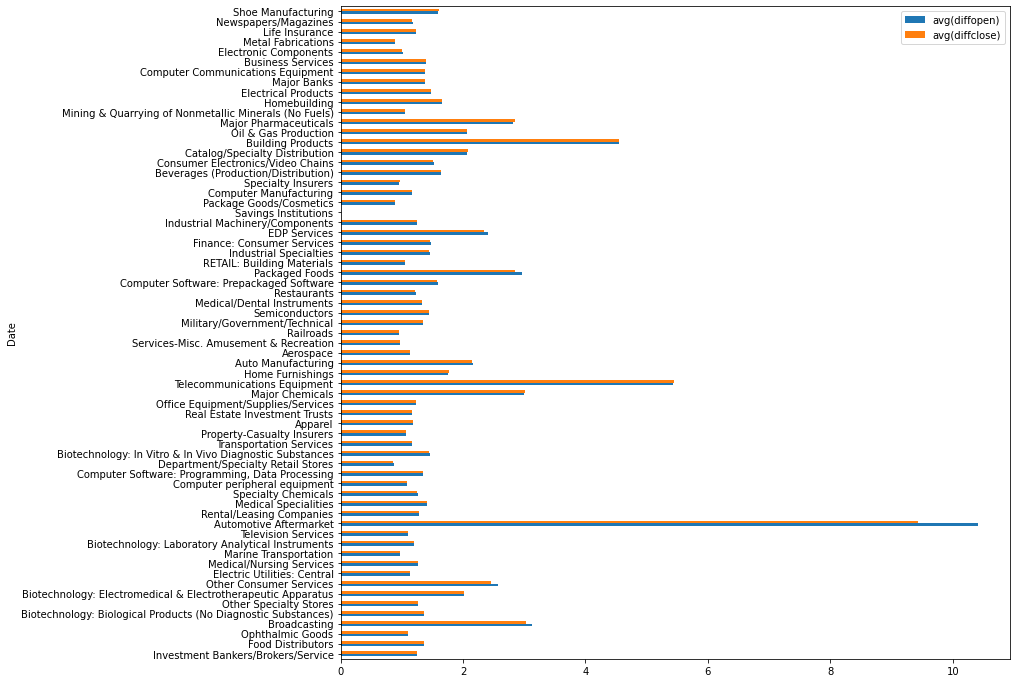

In [20]:
df2_for_plot.plot(kind='barh', x='industry', y=df2_for_plot.columns.tolist()[1:], figsize=(12, 12), ylabel='Stock Price', xlabel='Date')

plt.show()